## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Input, Dense
from keras.models import Model

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[521, 256, 128]):
    """ Code Here
        建立你的神經網路
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation='relu')(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, activation='relu')(x)
            x = BatchNormalization()(x)
        
    out = Dense(units=output_units, activation='softmax')(x)
    
    model = Model(inputs=[input_layer], outputs=[out])   
    
    return model

In [7]:
""" Code Here
    設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZE = [16, 32, 128, 256]
MOMENTUM = 0.95

In [8]:
results = {}
""" Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch_size = %s" % str(batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          verbose=0)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'batch_size_%d' % batch_size
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Experiment with batch_size = 16
Experiment with batch_size = 32
Experiment with batch_size = 128
Experiment with batch_size = 256


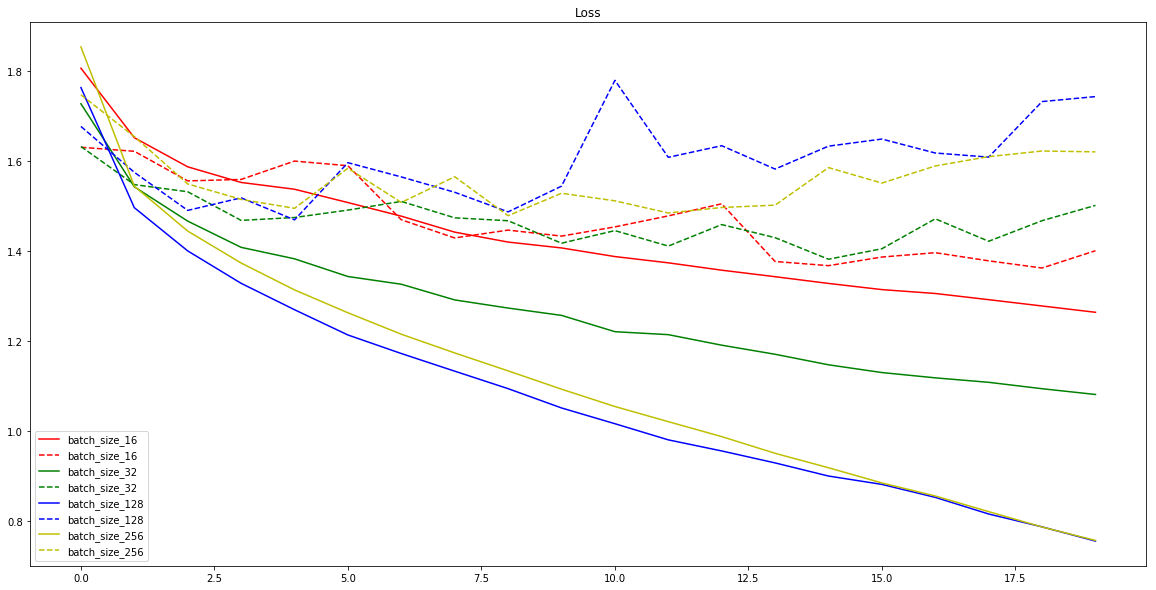

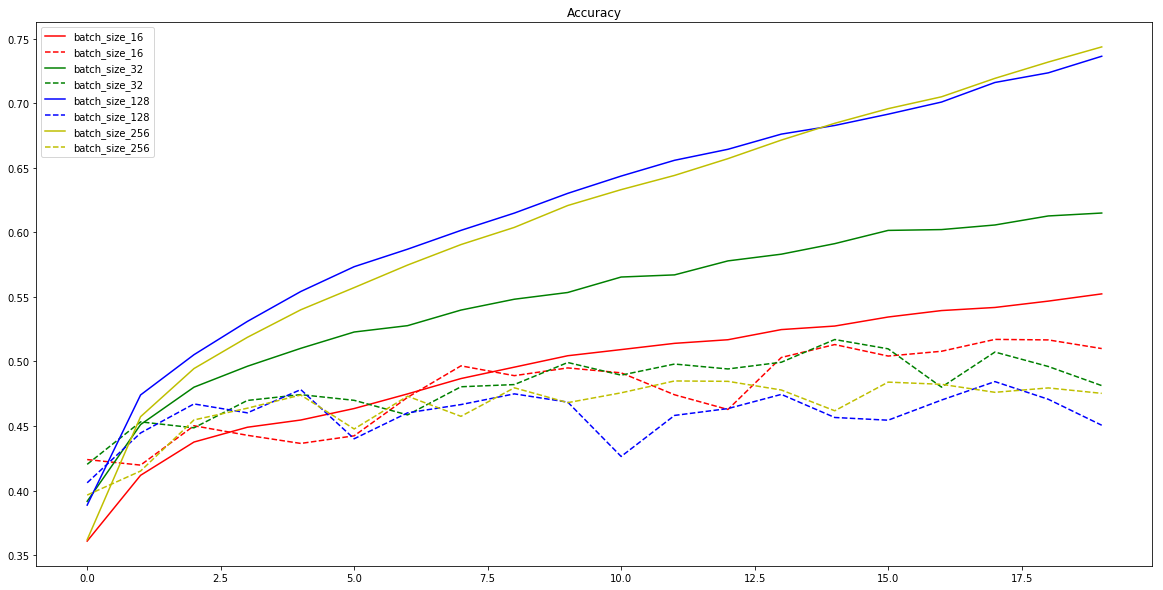

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
""" Code Here
    將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(20, 10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()